In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import funkcje as f


path = os.path.abspath("dane")
rate2016_df = pd.read_csv(os.path.join(path, "Rate2016.csv"))
rate2015_df = pd.read_csv(os.path.join(path, "Rate2015.csv"))
rate2014_df = pd.read_csv(os.path.join(path, "Rate2014.csv"))
network_df = pd.read_csv(os.path.join(path, "Network.csv"))
pa_df = pd.read_csv(os.path.join(path, "PlanAttributes.csv"))
bcs_df = pd.read_csv(os.path.join(path, "BenefitsCostSharing.csv"))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Aplikacja służąca do wyboru ubezpieczenia zdrowotnego

W pierwszym kroku zadamy Ci kilka pytań dotyczących Twoich preferencji odnośnie ubezpieczenia:

Lista state codes:
['AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', 'HI', 'IA', 'IL', 'IN', 'KS', 'LA', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WI', 'WV', 'WY']

Podaj kod stanu, w którym chcesz się ubezpieczyć:IA
Czy chcesz się ubezpieczyć z rodziną? y/n:y

Poniższa lista prezentuje dostępne opcje ubezpieczenia rodzinnego:

 2 - Couple
 3 - Primary Subscriber and One Dependent
 4 - Primary Subscriber and Two Dependents
 5 - Primary Subscriber and Three or More Dependents
 6 - Couple And One Dependent
 7 - Couple And Two Dependents
 8 - Couple And Three or More Dependents

Z powyższej listy wybierz numer opcji ubezpieczenia:8

Poniżej znajdują się wybrane dla Ciebie plany ubezpieczeniowe:


,CoupleAndThreeOrMoreDependents,PlanId,PlanMarketingName,NetworkName
0,24.46,11474IA0030002,"Renaissance Group Dental PPO, EHB Certified",Delta Dental
1,31.23,11474IA0030001,"Renaissance Group Dental PPO, EHB Certified",Renaissance Dental
2,97.29,23499IA0010009,"Plan 9. MAC PPO, $1500 Annual Maximum, Ortho",Careington Maximum Care Network
3,119.89,23499IA0010002,"Plan 2. Passive PPO $1000 Annual Maximum, Ortho",Careington Maximum Care Network


None



W poniższych tabelach zaprezentowane zostały benefity, dla każdego z czterech powyższych planów


,PlanIdBase,BenefitName,ExtraCharge,LimitQty,LimitUnit
0,11474IA0030002,Accidental Dental,50%,N/A,N/A
1,11474IA0030002,Basic Dental Care - Adult,50% Coinsurance after deductible,N/A,N/A
2,11474IA0030002,Basic Dental Care - Child,40% Coinsurance after deductible,N/A,N/A
3,11474IA0030002,Dental Check-Up for Children,20%,1,Visit(s) per 6 Months
4,11474IA0030002,Major Dental Care - Adult,50% Coinsurance after deductible,N/A,N/A


,PlanIdBase,BenefitName,ExtraCharge,LimitQty,LimitUnit
0,11474IA0030001,Accidental Dental,0%,N/A,N/A
1,11474IA0030001,Basic Dental Care - Adult,20% Coinsurance after deductible,N/A,N/A
2,11474IA0030001,Basic Dental Care - Child,25% Coinsurance after deductible,N/A,N/A
3,11474IA0030001,Dental Check-Up for Children,0%,1,Visit(s) per 6 Months
4,11474IA0030001,Major Dental Care - Adult,50% Coinsurance after deductible,N/A,N/A


,PlanIdBase,BenefitName,ExtraCharge,LimitQty,LimitUnit
0,23499IA0010009,Basic Dental Care - Child,30% Coinsurance after deductible,N/A,N/A
1,23499IA0010009,Dental Check-Up for Children,No Charge,1,Visit(s) per 6 Months
2,23499IA0010009,Major Dental Care - Child,50% Coinsurance after deductible,N/A,N/A
3,23499IA0010009,Dental Check-Up for Children,No Charge,1,Visit(s) per 6 Months
4,23499IA0010009,Basic Dental Care - Child,30% Coinsurance after deductible,N/A,N/A


,PlanIdBase,BenefitName,ExtraCharge,LimitQty,LimitUnit
0,23499IA0010002,Basic Dental Care - Child,30% Coinsurance after deductible,N/A,N/A
1,23499IA0010002,Dental Check-Up for Children,No Charge,1,Visit(s) per 6 Months
2,23499IA0010002,Major Dental Care - Child,50% Coinsurance after deductible,N/A,N/A
3,23499IA0010002,Dental Check-Up for Children,No Charge,1,Visit(s) per 6 Months
4,23499IA0010002,Basic Dental Care - Child,30% Coinsurance after deductible,N/A,N/A


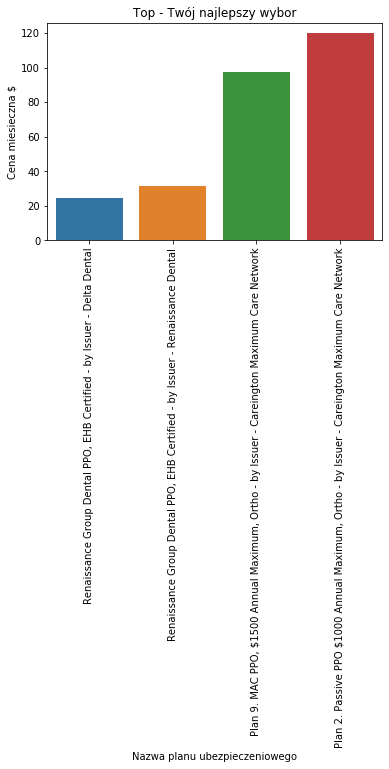

In [2]:
f.best_healthcare(network_df, pa_df, rate2016_df, rate2015_df, rate2014_df, bcs_df)